Goal:

The goal of this group project is to predict stroke’s risk given a set of life habits, particularly we want to predict stokes given their gender, age, hypertension condition, heart disease condition, marital status, working status, residency type, average glucose level in blood, body mass index and smoking status and create a classifier for high-risk patient. 

In [1]:
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import sklearn.tree
from sklearn import svm
import sklearn.preprocessing
import sklearn.decomposition

import pandas.plotting

from os import system

import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols

!pip install plotly
import plotly
!pip install cufflinks
import cufflinks as cf
cf.go_offline()
!pip install ipywidgets
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prep data

In [7]:
# Read data
import pandas as pd
path = "datasets/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)

In [3]:
# read the data if using google colab
#from google.colab import drive
#drive.mount('/content/drive')
#path = "/content/drive/MyDrive/healthcare-dataset-stroke-data.csv"
#df = pd.read_csv(path)

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
# drop column "id"
df = df.drop(columns=['id'])

In [6]:
# check if the dataset has missing values
df.isnull().values.any()

True

In [7]:
# check which column has missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# replace missing values in "bmi" with average value because it is only a small part of the dataset
df['bmi'].fillna((df['bmi'].mean()), inplace=True)

#check if the new dataset has missing values
df.isnull().values.any()

False

# EDA: Analyze the features of people who get stroke, and see if there is any correlation between the variables. 

In [9]:
df.iplot(kind='bar',x='gender',y='stroke',title = 'Gender Analysis On Stroke')
# we can see that more females get stroke than males

In [10]:
df.iplot(kind='bar',x='age',y='stroke',title = 'Age Range Who Get Stroke')
# we can see that people at any range can have stroke, 
# but older people apparently have higher possibilities to get stroke

In [11]:
df.iplot(kind='bar',x='hypertension',y='stroke', title = 'Hypertension ~ Stroke')

In [12]:
df.iplot(kind='bar',x='heart_disease',y='stroke', title = 'Heart Disease ~ Stroke')

In [13]:
df.iplot(kind='bar',x='ever_married',y='stroke', title = 'Ever Married ~ Stroke')

In [14]:
df.iplot(kind='bar',x='work_type',y='stroke', title = 'Work Type ~ Stroke')

In [15]:
df.iplot(kind='bar',x='Residence_type',y='stroke', title = 'Residence Type ~ Stroke')

In [16]:
df.iplot(kind='bar',x='smoking_status',y='stroke', title = 'Smoking Status ~ Stroke')

In [17]:
df.iplot(kind='bar',x='bmi',y='stroke', title = 'Smoking Status ~ Stroke')

In [18]:
path = "datasets/healthcare-dataset-stroke-data.csv"
df1 = pd.read_csv(path)
df1 = df1.drop(columns=['id'])
df1['bmi'].fillna((df1['bmi'].mean()), inplace=True)

In [19]:

df1 = pd.get_dummies(df1,
                     columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
  
display(df1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


In [20]:
for col in df1.columns:
    print(col)

age
hypertension
heart_disease
avg_glucose_level
bmi
stroke
gender_Male
gender_Other
ever_married_Yes
work_type_Never_worked
work_type_Private
work_type_Self-employed
work_type_children
Residence_type_Urban
smoking_status_formerly smoked
smoking_status_never smoked
smoking_status_smokes


In [21]:
df1.rename(columns={'work_type_Self-employed': 'work_type_SelfEmployed', 
                   'smoking_status_formerly smoked': 'smoking_status_formerlySmoked',
                  'smoking_status_never smoked': 'smoking_status_neverSmoked'}, inplace=True)
df1.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_SelfEmployed,work_type_children,Residence_type_Urban,smoking_status_formerlySmoked,smoking_status_neverSmoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,-0.025464,-0.011802,0.335705,-0.028600,0.203884,0.070822,-0.442843,-0.000120,0.104257,0.106220,0.085579
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.025464,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.679125,0.164243,0.114644,0.155068,0.335705,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226
work_type_Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028600,-0.014882,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099


In [22]:
# fit logistic regression model
from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import logit, glm, ols

y = df1["stroke"]
X = df1[df1.columns[df1.columns != "stroke"]]
logit_model = Logit(y, X).fit(method="lbfgs", maxiter=1000)
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5094
Method:                           MLE   Df Model:                           15
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                 0.09270
Time:                        01:56:30   Log-Likelihood:                -902.93
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 2.930e-31
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0367      0.004      8.793      0.000       0.029       0.045
hypertension                      0.8099      0.167      4.856      0.000       0.483       1.137
heart_disease                     0.6245      0.195      3.197      0.001       0.242       1.007
avg_glucose_level                 0.0026      0.001      2.033      0.042    9.37e-05       0.005
bmi                              -0.1265      0.009    -13.710      0.000      -0.145      -0.108
gender_Male                      -0.1005      0.136     -0.738      0.461      -0.368       0.167
gender_Other                     -0.2071      4.230     -0.049      0.961      -8.498       8.084
ever_married_Yes                 -0.5361      0.180     -2.981      0.003      -0.889      -0.184
work_type_Never_worked           -2.6508      2.949     -0.899      0.369      -8.432       3.130
work_type_Private                -0.7155      0.156     -4.596      0.000      -1.021      -0.410
work_type_SelfEmployed           -0.7860      0.197     -3.990      0.000      -1.172      -0.400
work_type_children               -3.7229      0.730     -5.102      0.000      -5.153      -2.293
Residence_type_Urban             -0.1823      0.129     -1.415      0.157      -0.435       0.070
smoking_status_formerlySmoked    -0.3299      0.184     -1.795      0.073      -0.690       0.030
smoking_status_neverSmoked       -0.7589      0.167     -4.547      0.000      -1.086      -0.432
smoking_status_smokes            -0.5332      0.206     -2.588      0.010      -0.937      -0.129
=================================================================================================
"""

We can see from the above logistic regression that the significant variables are age, hypertension, heart_disease, average glucose level, bmi, if the person is married, work type and if the person has never smoked or actually smokes

In [23]:
# see the correlations between attributes and make a heatmap

In [24]:
cordf = df1.corr(method='pearson')
cordf

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_SelfEmployed,work_type_children,Residence_type_Urban,smoking_status_formerlySmoked,smoking_status_neverSmoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,-0.025464,-0.011802,0.335705,-0.028600,0.203884,0.070822,-0.442843,-0.000120,0.104257,0.106220,0.085579
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.025464,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.679125,0.164243,0.114644,0.155068,0.335705,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226
work_type_Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028600,-0.014882,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099


In [25]:
cordf.iplot(kind='heatmap')


# Build Machine Learning Models and Compare Their Performances

In [26]:
# machine learning models with 10-fold cross validation

In [27]:
path = "datasets/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [28]:
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Building machine learning models

In [30]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
y1 = df["stroke"]
X1 = df[df.columns[df.columns != "stroke"]]

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(max_iter=1000)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.9f (%.9f)' % (mean(scores), std(scores)))

Accuracy: 0.951467710 (0.013495843)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be 

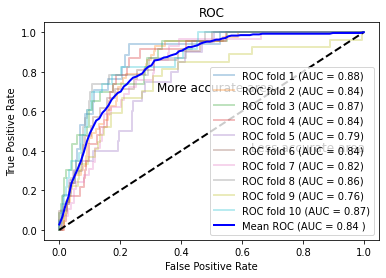

In [31]:
# plot AUC curve for logistic regression

from scipy import interp
from sklearn.metrics import roc_curve,auc
import matplotlib.patches as patches

clf = LogisticRegression(max_iter=1000)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [32]:
# mean roc for logistics regression
mean_auc

0.8389933923053097

In [33]:
# in a different way to get roc for logistic regression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc= cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('ROC: %.4f' % (mean(roc)))

ROC: 0.8391


In [34]:
# decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model2 = tree.DecisionTreeClassifier()
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.9f (%.9f)' % (mean(scores2), std(scores2)))

Accuracy: 0.904892368 (0.017918627)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be 

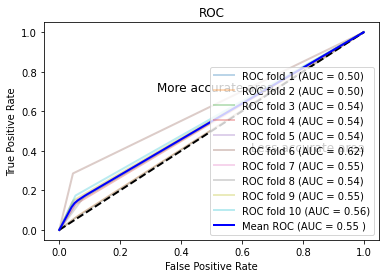

In [35]:
# plot AUC curve for decision tree

random_state = np.random.RandomState(0)

clf = DecisionTreeClassifier(random_state=random_state)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [36]:
print(mean_auc)

0.5460854700129811


In [37]:
# in a different way to get roc for decision tree classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc2= cross_val_score(model2, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('ROC: %.4f' % (mean(roc2)))

ROC: 0.5507


In [38]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=6)
scores3 = cross_val_score(model3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.9f (%.9f)' % (mean(scores3), std(scores3)))

Accuracy: 0.950293542 (0.013278431)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.interp is deprecated and will be 

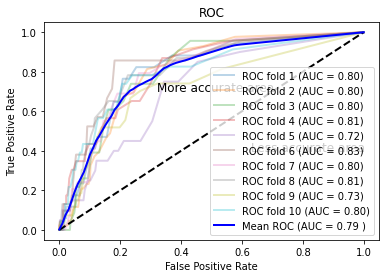

In [39]:
# plot AUC curve for randome forest classfier

random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state = random_state)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [40]:
print(mean_auc)

0.7912841934501482


In [41]:
# in a different way to get roc for random forest classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc3= cross_val_score(model3, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('ROC: %.4f' % (mean(roc3)))

ROC: 0.7990


In [42]:
# Naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB

model5 = GaussianNB()
scores5 = cross_val_score(model5, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.9f (%.9f)' % (mean(scores5), std(scores5)))

Accuracy: 0.417025440 (0.056286985)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be 

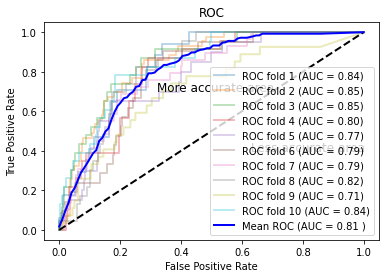

In [43]:
random_state = np.random.RandomState(0)
clf = GaussianNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [44]:
print(mean_auc)

0.8065996035107629


In [45]:
# # KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

k = int(sqrt(len(y) * 0.9))
if k % 2 == 0:
  k += 1

model6 = KNeighborsClassifier(n_neighbors=k)
scores6 = cross_val_score(model6, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores6))

0.9512720156555773


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be 

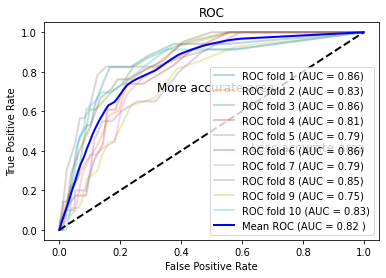

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# plot AUC curve for KNN classifier

clf = KNeighborsClassifier(n_neighbors=k)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc6= cross_val_score(model6, X, y, scoring='roc_auc', cv=10, n_jobs=-1)

print('ROC: %.4f' % (mean(roc6)))

ROC: 0.8214


In [48]:
# # SVM classifier
# from sklearn.svm import SVC
# model4 = SVC(kernel='linear')
# scores4 = cross_val_score(model4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.9f (%.9f)' % (mean(scores4), std(scores4)))

In [49]:
# plot AUC curve for SVM classfier

# random_state = np.random.RandomState(0)
# clf = svm.SVC(kernel="linear", probability=True, random_state=random_state)
# cv = KFold(n_splits=10, random_state=1, shuffle=True)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0,1,100)
# i = 1
# for train,test in cv.split(X,y):
#     prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
#     fpr, tpr, t = roc_curve(y1[test], prediction[:, 1])
#     tprs.append(interp(mean_fpr, fpr, tpr))
#     roc_auc = auc(fpr, tpr)
#     aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
#     i= i+1

# plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
# mean_tpr = np.mean(tprs, axis=0)
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, color='blue',
#          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.legend(loc="lower right")
# plt.text(0.32,0.7,'More accurate area',fontsize = 12)
# plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
# plt.show()

In [50]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# roc4= cross_val_score(model4, X, y, scoring='roc_auc', cv=10, n_jobs=-1)

# print('ROC: %.4f' % (mean(roc4)))

In [51]:
print(df["stroke"].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


In [52]:
!pip install imbalanced-learn
from imblearn import over_sampling
from imblearn import under_sampling

# Pre-processing: random oversampling

In [53]:
#Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

Mean accuracy is:  0.6974559686888455
Mean AUC is:  0.8111936628961859


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be 

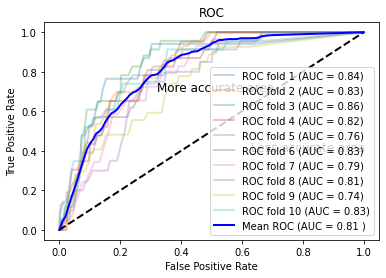

In [54]:
#KNN with oversampling
k = int(sqrt(len(y) * 0.9))
if k % 2 == 0:
  k += 1

clf = KNeighborsClassifier(n_neighbors=k)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

pipeline = make_pipeline(SMOTE(), clf)
scores6 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean accuracy is: ", mean(scores6))
scores6 = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print("Mean AUC is: ", mean(scores6))
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
  sm = SMOTE()
  X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
  prediction = clf.fit(X_over,y_over).predict_proba(X.iloc[test])
  fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.8356164383561643


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be 

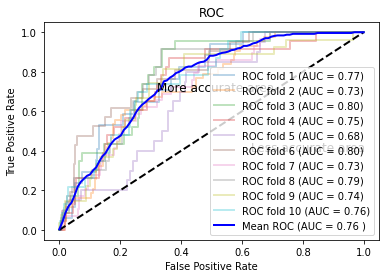

In [55]:
#logistic regression with oversampling

clf = LogisticRegression(max_iter=1000)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(), clf)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
  sm = SMOTE()
  X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
  prediction = clf.fit(X_over,y_over).predict_proba(X.iloc[test])
  fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.8821917808219177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be 

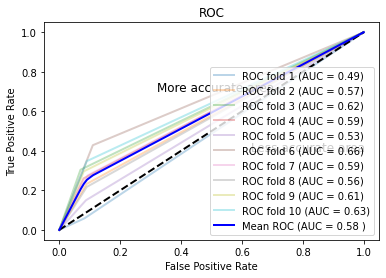

In [56]:
# decision tree classifier with oversampling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(), clf)

scores2 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores2))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X.iloc[train], y.iloc[train])
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.8111936628961859


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

scipy.interp is deprecated and will be 

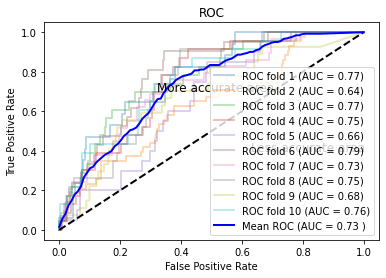

In [57]:
#Gaussian Naive Bayes with oversampling
clf = GaussianNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(), clf)
scores5 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores6))
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X.iloc[train], y.iloc[train])
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.9074363992172213


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

scipy.interp is deprecated and will be 

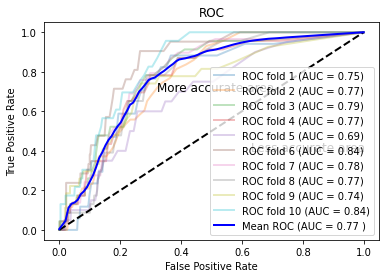

In [58]:
#Random forest with oversampling
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state = 2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(), clf)
scores3 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores3))
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X.iloc[train], y.iloc[train])
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
#SVM
clf = svm.SVC(kernel="linear", probability=True, random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(), clf)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X.iloc[train], y.iloc[train])
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# Pre-processing: random undersampling and SMOTE

In [60]:
#mix under and over sampling
from imblearn.under_sampling import RandomUnderSampler

Mean accuracy is:  0.7223091976516633
Mean AUC is:  0.824928517121309


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

scipy.interp is deprecated and will be 

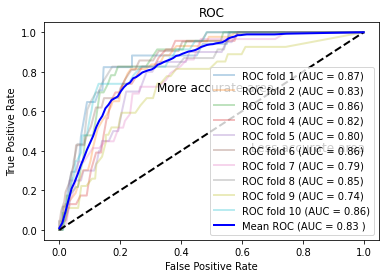

In [61]:
#KNN
k = int(sqrt(len(y) * 0.9))
if k % 2 == 0:
  k += 1

clf = KNeighborsClassifier(n_neighbors=k)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

pipeline = make_pipeline(SMOTE(sampling_strategy=0.2), RandomUnderSampler(sampling_strategy=0.8), clf)
scores6 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean accuracy is: ", mean(scores6))
scores6 = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print("Mean AUC is: ", mean(scores6))
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
  sm = SMOTE(sampling_strategy=0.2)
  X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
  under = RandomUnderSampler(sampling_strategy=0.8)
  X_train, y_train = under.fit_resample(X_over, y_over)
  prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
  fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.8193737769080235


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be 

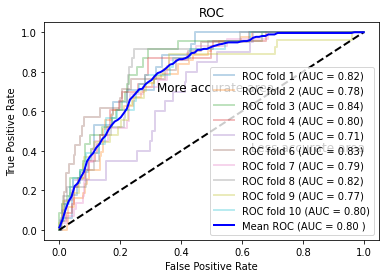

In [62]:
#Logistic Regression
clf = LogisticRegression(max_iter=1000)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(sampling_strategy=0.2), RandomUnderSampler(sampling_strategy=0.8), clf)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
  sm = SMOTE(sampling_strategy=0.2)
  X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
  under = RandomUnderSampler(sampling_strategy=0.8)
  X_train, y_train = under.fit_resample(X_over, y_over)
  prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
  fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.8033268101761253


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning:

scipy.interp is deprecated and will be 

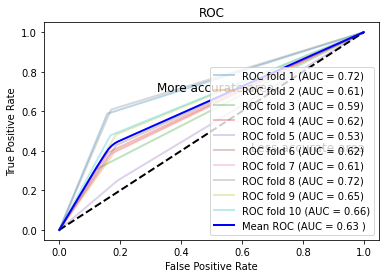

In [63]:
# decision tree classifier
clf = DecisionTreeClassifier(random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(sampling_strategy=0.2), RandomUnderSampler(sampling_strategy=0.8), clf)
scores2 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores2))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE(sampling_strategy=0.2)
    X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
    under = RandomUnderSampler(sampling_strategy=0.8)
    X_train, y_train = under.fit_resample(X_over, y_over)
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.824928517121309


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be 

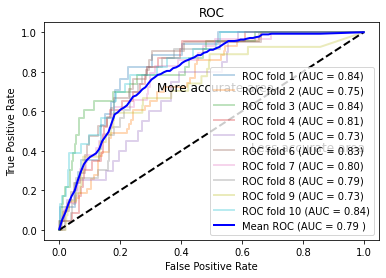

In [64]:
#Gaussian Naive Bayes
clf = GaussianNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(sampling_strategy=0.2), RandomUnderSampler(sampling_strategy=0.8), clf)
scores5 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores6))
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE(sampling_strategy=0.2)
    X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
    under = RandomUnderSampler(sampling_strategy=0.8)
    X_train, y_train = under.fit_resample(X_over, y_over)
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

0.846771037181996


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be 

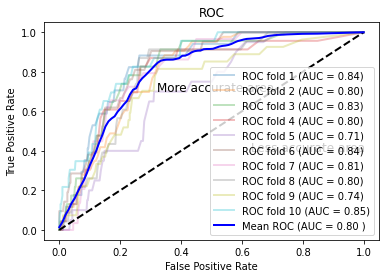

In [65]:
#Random forest
clf = RandomForestClassifier(random_state = 2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(sampling_strategy=0.2), RandomUnderSampler(sampling_strategy=0.8), clf)
scores3 = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores3))
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE(sampling_strategy=0.2)
    X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
    under = RandomUnderSampler(sampling_strategy=0.8)
    X_train, y_train = under.fit_resample(X_over, y_over)
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [66]:
#SVM
clf = svm.SVC(kernel="linear", probability=True, random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pipeline = make_pipeline(SMOTE(sampling_strategy=0.2), RandomUnderSampler(sampling_strategy=0.8), clf)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    sm = SMOTE(sampling_strategy=0.2)
    X_over, y_over = sm.fit_resample(X.iloc[train], y.iloc[train])
    under = RandomUnderSampler(sampling_strategy=0.8)
    X_train, y_train = under.fit_resample(X_over, y_over)
    prediction = clf.fit(X_train,y_train).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# Manual Feature selection for KNN and Gaussian

In [94]:
#Feature selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df1
num_var = ["age", "avg_glucose_level", "bmi"]
cat_var = list(set(df1.columns) - set(num_var))
cat_var.remove("stroke")

p_num_var = f_classif(df1[num_var], y)
print(p_num_var[1])

p_cat_var = chi2(df1[cat_var], y)
print(p_cat_var[1])

features = []
features += num_var
for i in range(0, len(p_cat_var[1])):
  if p_cat_var[1][i] < 0.05:
    features.append(cat_var[i])
  i+=1
print(features)

X_feat = df1[features]
y_feat = df1['stroke']

[7.03077751e-71 2.76781052e-21 5.36195713e-03]
[5.78413585e-01 2.71535536e-05 2.88431420e-01 4.38304580e-01
 2.43608703e-08 5.56792494e-01 4.65358240e-05 6.58715352e-21
 5.59264829e-06 3.74873586e-18 8.20946899e-01 6.17814060e-01
 8.14822104e-01]
['age', 'avg_glucose_level', 'bmi', 'smoking_status_formerlySmoked', 'work_type_children', 'work_type_SelfEmployed', 'heart_disease', 'ever_married_Yes', 'hypertension']
['age', 'avg_glucose_level', 'bmi', 'heart_disease', 'hypertension']


0.9512720156555773


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning:

scipy.interp is deprecated and will be 

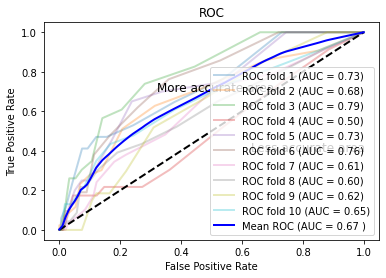

In [93]:
#KNN with feature selection
k = int(sqrt(len(y) * 0.9))
if k % 2 == 0:
  k += 1

model6 = KNeighborsClassifier(n_neighbors=k)
scores6 = cross_val_score(model6, X_feat, y_feat, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores6))

clf = KNeighborsClassifier(n_neighbors=k)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_feat,y_feat):
    prediction = clf.fit(X_feat.iloc[train],y_feat.iloc[train]).predict_proba(X_feat.iloc[test])
    fpr, tpr, t = roc_curve(y_feat[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Accuracy: 0.877299413 (0.011106429)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be 

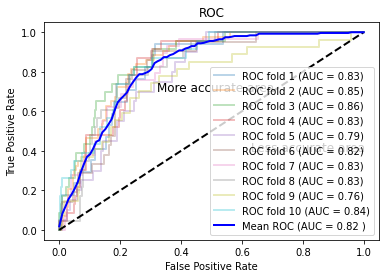

In [95]:
#logistic regression with feature selection
model = GaussianNB()
# evaluate model
scores = cross_val_score(model, X_feat, y_feat, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.9f (%.9f)' % (mean(scores), std(scores)))

clf = GaussianNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_feat,y_feat):
    prediction = clf.fit(X_feat.iloc[train],y_feat.iloc[train]).predict_proba(X_feat.iloc[test])
    fpr, tpr, t = roc_curve(y_feat[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# Feature selection with RFECV

In [70]:
from sklearn.feature_selection import RFECV

In [71]:
#Random forest
model6 = RandomForestClassifier(random_state=6)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
selector = RFECV(model6, step=1, cv=cv, scoring='roc_auc').fit(X.values, y_feat.values)


print('The optimal number of features is {}'.format(selector.n_features_))
features = [f for f,s in zip(X.columns, selector.support_) if s]
print('The selected features are:')
print ('{}'.format(features))

X_feat = df1[features]
y_feat = df1['stroke']

The optimal number of features is 9
The selected features are:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'work_type_Private', 'Residence_type_Urban', 'smoking_status_neverSmoked']


0.94853228962818


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

scipy.interp is deprecated and will be 

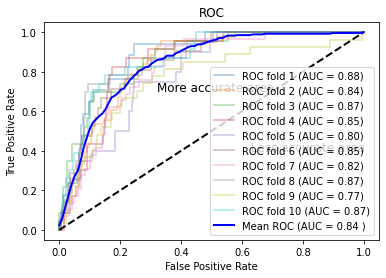

In [72]:
model = RandomForestClassifier(random_state=6)
scores = cross_val_score(model, X_feat, y_feat, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(scores))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_feat,y_feat):
    prediction = clf.fit(X_feat.iloc[train],y_feat.iloc[train]).predict_proba(X_feat.iloc[test])
    fpr, tpr, t = roc_curve(y_feat[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [73]:
#Logistic Regression
model = LogisticRegression(max_iter=1000)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
selector = RFECV(model, step=1, cv=cv, scoring='roc_auc').fit(X.values, y.values)


print('The optimal number of features is {}'.format(selector.n_features_))
features = [f for f,s in zip(X.columns, selector.support_) if s]
print('The selected features are:')
print ('{}'.format(features))

X_feat = df1[features]
y_feat = df1['stroke']

The optimal number of features is 16
The selected features are:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_SelfEmployed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerlySmoked', 'smoking_status_neverSmoked', 'smoking_status_smokes']


Logistic Regression rfecv doesn't drop any features

In [74]:
#Decision tree
model = tree.DecisionTreeClassifier(random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
selector = RFECV(model, step=1, cv=cv, scoring='roc_auc').fit(X.values, y.values)
print('The optimal number of features is {}'.format(selector.n_features_))
features = [f for f,s in zip(X.columns, selector.support_) if s]
print('The selected features are:')
print ('{}'.format(features))

X_feat = df1[features]
y_feat = df1['stroke']

The optimal number of features is 9
The selected features are:
['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'smoking_status_formerlySmoked', 'smoking_status_neverSmoked', 'smoking_status_smokes']


Accuracy: 0.907240705 (0.013335988)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

scipy.interp is deprecated and will be 

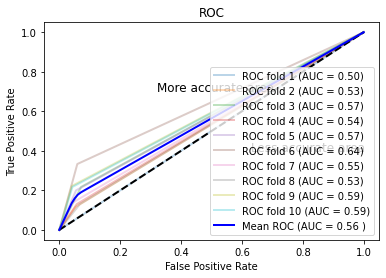

In [75]:
model = tree.DecisionTreeClassifier(random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X_feat, y_feat, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.9f (%.9f)' % (mean(scores), std(scores)))

clf = DecisionTreeClassifier(random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_feat,y_feat):
    prediction = clf.fit(X_feat.iloc[train],y_feat.iloc[train]).predict_proba(X_feat.iloc[test])
    fpr, tpr, t = roc_curve(y_feat[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Decision tree with rfecv features improved a little bit both. in accuracy and AUC

In [76]:
# #SVC
# from sklearn.svm import SVC
# model = SVC(kernel='linear', probability=True, random_state=2)
# cv = KFold(n_splits=10, random_state=1, shuffle=True)
# selector = RFECV(model, step=1, cv=cv, scoring='roc_auc').fit(X.values, y.values)


# print('The optimal number of features is {}'.format(selector.n_features_))
# features = [f for f,s in zip(X.columns, selector.support_) if s]
# print('The selected features are:')
# print ('{}'.format(features))

# X_feat = df1[features]
# y_feat = df1['stroke']

In [77]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.9f (%.9f)' % (mean(scores), std(scores)))
clf = svm.SVC(kernel="linear", probability=True, random_state=2)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_feat,y_feat):
    prediction = clf.fit(X_feat.iloc[train],y_feat.iloc[train]).predict_proba(X_feat.iloc[test])
    fpr, tpr, t = roc_curve(y_feat[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()